# Config

In [6]:
import os

import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

FIGURE_SIZE = (5, 4)
img_dir = "../img/ablation-k"

# Results config

In [1]:
# TDA Config
# config = {
# 	"method": "deeptda_500",
# 	"k_list": [100, 120, 140, 160, 180, 200],
# 	"thp_list": [18.75, 42.19, 34.38, 59.38, 85.94, 82.81],
# 	"energy_list": [340.25, 468.31, 682.12, 904.90, 1181.46, 1525.04]
# }

config = {
	"method": "DeepTDA_10n_1000",
	"k_list": [
     	600, 800, 1000, 1200, 1400, 1600, 1800, 2000
	],
	"thp_list": [
     	0, 10.94, 42.19, 70.31, 76.67, 68.75, 71.86, 68.75
	],
	"energy_list": [
     	None, 24.29, 38.06, 66.06, 105.08, 145.77, 195.52, 256.42
    ]
}


In [2]:
# TICA Config
# config = {
# 	"method": "deeptica_500",
# 	"k_list": [3000, 3500, 4000, 4500],
# 	"thp_list": [12.5, 35.93, 39.06, 39.06],
# 	"energy_list": [669.17, 1051.60, 1485.17, 1964.07]
# }

# config = {
# 	"method": "deeptica_1000",
# 	"k_list": [1000, 1500, 2000, 2200, 2400, 2600, 2800],
# 	"thp_list": [0, 0, 51.56, 82.81, 95.31, 100.0, 100.0,],
# 	"energy_list": [None, None, 640.93, 770.53, 897.28, 1178.62, 1292.07]
# }


In [3]:
# Auto-encoder config
# config = {
# 	"method": "autoencoder_500",
# 	"k_list": [100, 200, 400, 600],
# 	"thp_list": [67.19, 96.88, 92.19, 98.44],
# 	"energy_list": [85.72, 199.97, 576.68, 1277.06]
# }

# config = {
# 	"method": "autoencoder_1000",
# 	"k_list": [100, 150, 200, 250],
# 	"thp_list": [21.88, 62.5, 92.19, 100.0],
# 	"energy_list": [66.21, 137.46, 238.41, 382.08]
# }


# Plot

In [7]:
def draw_k_plot(
	config,
	img_dir = "../img",
):
	name = config["method"]
	thp_list = config["thp_list"]
	energy_list = config["energy_list"]

	fig_steeredMD_k, ax_steeredMD_k = plt.subplots(1, 1, figsize=FIGURE_SIZE)
	plt.plot(energy_list, thp_list, color="red", label=f'{name}', linewidth=3)
	plt.scatter(energy_list, thp_list, color="black")
	plt.tick_params(
		left = True,
		right = False,
		labelleft = True, 
		labelbottom = True,
		bottom = True
	) 
	plt.xticks(fontsize=14)
	plt.yticks(fontsize=14)
	plt.legend()
	for pos in ['left', 'right', 'top', 'bottom']:
		ax_steeredMD_k.spines[pos].set_linewidth(1.5)
	ax_steeredMD_k.set_xlabel('Energy (↓)', fontsize=18)
	ax_steeredMD_k.set_ylabel("THP (↑)", fontsize=18)
	ax_steeredMD_k.grid(linestyle="dotted")
	# ax_steeredMD_k.set_xticks([-800, -600, -400, -200])
	ax_steeredMD_k.set_yticks([0, 25, 50, 75, 100])

	if not os.path.exists(f"{img_dir}/{name}.pdf"):
		fig_steeredMD_k.savefig(f"{img_dir}/{name}.pdf", dpi=400, format="pdf", bbox_inches="tight")
	else:
		raise ValueError(f"File {name} already exists.")

	return fig_steeredMD_k, ax_steeredMD_k

(<Figure size 500x400 with 1 Axes>,
 <Axes: xlabel='Energy (↓)', ylabel='THP (↑)'>)

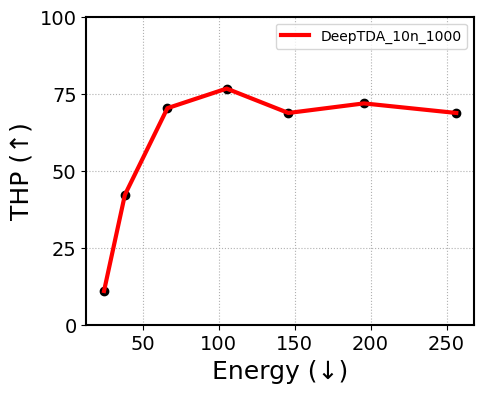

In [9]:
draw_k_plot(
	config = config,
    img_dir = img_dir,
)